In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans

In [2]:
keypoint_data = [] 
descriptor_data = []
path = 'task_5/database/'
imgs = glob.glob('task_5/database/*.jpg')


In [3]:
## Feature extractor
def ext_features(img):
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp_1 = orb.detect(img, None)

    # compute the descriptors with ORB
    kp1, des1 = orb.compute(img, kp_1)
    return kp1, des1

## Histogram function
def hist(descriptor_data, model):
    histogram = np.zeros(len(model.cluster_centers_))
    cluster_result = model.predict(descriptor_data)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [4]:
for frame in imgs:
    image = cv2.imread(frame, cv2.IMREAD_GRAYSCALE)

    # compute descriptors
    keypoints, descriptors = ext_features(image)

    # store keypoints and descriptors
    keypoint_data.append(keypoints)
    descriptor_data.append(descriptors)

tuple_descriptor_data = tuple(descriptor_data)
descriptor_data = np.vstack(tuple_descriptor_data)

In [5]:
model = MiniBatchKMeans(n_clusters=300)
model.fit(descriptor_data)

MiniBatchKMeans(n_clusters=300)

In [6]:
# Computing histogram for all the images in the database

histogram_data = np.zeros((len(os.listdir("task_5/database/")), 300))
database = glob.glob('task_5/database/*.jpg')
index = 0
for frame in database:
    image = cv2.imread(frame, cv2.IMREAD_GRAYSCALE) # Converting current image to grayscale
    keypoints, descriptors = ext_features(image)    # Computing features
    histogram = hist(descriptors, model)            # histogram formation
    histogram_data[index] = histogram
    index += 1



In [7]:
# Computing histogram for all the images in the queries

histogram_query = np.zeros((len(os.listdir("task_5/query/")), 300))
query = glob.glob('task_5/query/*.jpg')
index = 0
for frame in query:
    image = cv2.imread(frame, cv2.IMREAD_GRAYSCALE)
    keypoints, descriptors = ext_features(image)
    histogram = hist(descriptors, model)
    histogram_query[index] = histogram
    index += 1

In [8]:
#Getting the nearest neighbors index

knn = NearestNeighbors(n_neighbors=1)
knn.fit(histogram_data)
distance, nearest_index = knn.kneighbors(histogram_query)

Intruder2 is found in dr5rsn0yet6m-dr5rsn0ympkm-cds-3670f40ef7987d5a-20161022-1109-395.jpg
Intruder3 is found in dr5rsn1tgm9f-dr5rsn1tggkn-cds-22ecab6d4a71bfcf-20160901-1157-7188.jpg
Intruder1 is found in dr5rsn1w5bcx-dr5rsn1tuppy-cds-22ecab6d4a71bfcf-20160901-1157-7368.jpg


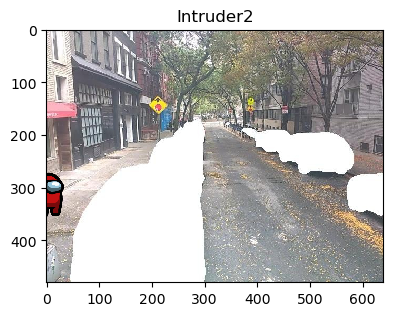

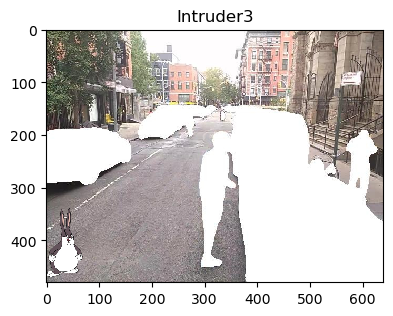

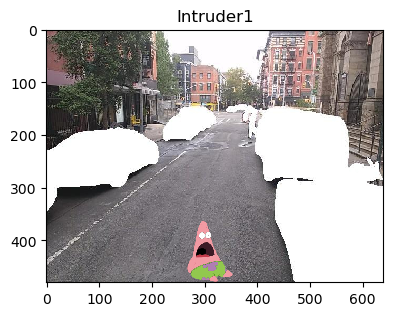

In [9]:
## Finding Intruders

path = "task_5/database/"
[n, m, p] = [1, 1, 1]

# show all images corresponding to each query
for index, image in enumerate(os.listdir(path)):
    if index in nearest_index[0]:
        fig = plt.figure(figsize=(20, 20))
        fig.add_subplot(4, 4, n)
        n += 1
        # read curent image
        image_path = os.getcwd() + "/" + path + "/" + image
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title('Intruder1')
        print('Intruder1 is found in', os.path.relpath(image_path, path))
        plt.savefig('intruder1.png')
    elif index in nearest_index[1]:
        fig1 = plt.figure(figsize=(20, 20))
        fig1.add_subplot(4, 4, m)
        m += 1
        # read curent image
        image_path = os.getcwd() + "/" + path + "/" + image
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title('Intruder2')
        print('Intruder2 is found in',os.path.relpath(image_path, path))
        plt.savefig('intruder2.png')
    elif index in nearest_index[2]:
        fig2 = plt.figure(figsize=(20, 20))
        fig2.add_subplot(4, 4, p)
        p += 1
        # read curent image
        image_path = os.getcwd() + "/" + path + "/" + image
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title('Intruder3')
        print('Intruder3 is found in',os.path.relpath(image_path, path))
        plt.savefig('intruder3.png')